In [1]:
# 📘 0. Libraries & configuración inicial
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cargamos el Wisconsin Breast Cancer (vía sklearn)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnostico'] = data.target

In [3]:
# Análisis y descripción del dataset
# 1.1 Información general
print(df.shape)  
df.head() 

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# 1.2 Descripción estadística
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
# Interpretación: variables explicativas son numéricas continuas.
# La variable objetivo "target" es categórica binaria (maligno=0, benigno=1).
# Tipos de variables
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
# Renombrar variables al español
renom = {
    'mean radius': 'radio_promedio',
    'mean texture': 'textura_promedio',
    'mean perimeter': 'perímetro_promedio',
    'mean area': 'área_promedio',
    'mean smoothness': 'suavidad_promedio',
    'mean compactness': 'compacidad_promedio',
    'mean concavity': 'concavidad_promedio',
    'mean concave points': 'puntos_cóncavos_promedio',
    'mean symmetry': 'simetría_promedio',
    'mean fractal dimension': 'dimensión_fractal_promedio',
    'radius error': 'error_de_radio',
    'texture error': 'error_de_textura',
    'perimeter error': 'error_de_perímetro',
    'area error': 'error_de_área',
    'smoothness error': 'error_de_suavidad',
    'compactness error': 'error_de_compacidad',
    'concavity error': 'error_de_concavidad',
    'concave points error': 'error_de_puntos_cóncavos',
    'symmetry error': 'error_de_simetría',
    'fractal dimension error': 'error_de_dimensión_fractal',
    'worst radius': 'radio_peor',
    'worst texture': 'textura_peor',
    'worst perimeter': 'perímetro_peor',
    'worst area': 'área_peor',
    'worst smoothness': 'suavidad_peor',
    'worst compactness': 'compacidad_peor',
    'worst concavity': 'concavidad_peor',
    'worst concave points': 'puntos_cóncavos_peor',
    'worst symmetry': 'simetría_peor',
    'worst fractal dimension': 'dimensión_fractal_peor'
}
df = df.rename(columns=renom)
df.head()

,radio_promedio,textura_promedio,perímetro_promedio,área_promedio,suavidad_promedio,compacidad_promedio,concavidad_promedio,puntos_cóncavos_promedio,simetría_promedio,dimensión_fractal_promedio,...,textura_peor,perímetro_peor,área_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_cóncavos_peor,simetría_peor,dimensión_fractal_peor,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


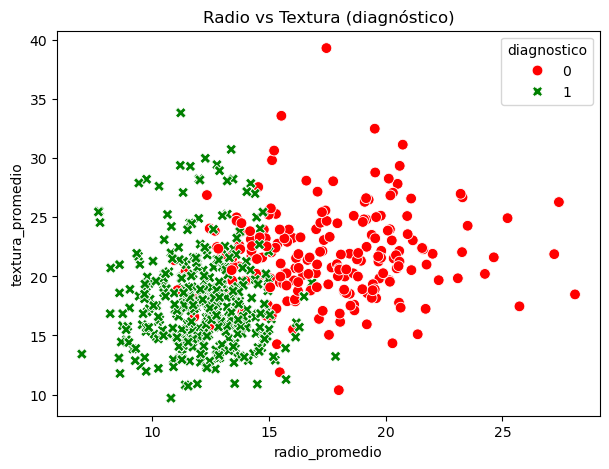

In [7]:
# Visualización de los datos
# Scatter plot de dos características seleccionadas
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='radio_promedio', y='textura_promedio',
    hue='diagnostico', 
    palette={0:'red', 1:'green'},
    data=df, style='diagnostico', s=60
)
plt.title('Radio vs Textura (diagnóstico)')
plt.show()

In [8]:
# Implementación manual: función sigmoid, coste y gradiente
# 4.1 Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# 4.2 Función de coste y gradiente (vectorizada)
def cost_grad(theta, X, y):
    m = y.size
    h = sigmoid(X @ theta)
    J = (-1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    grad = (1/m) * (X.T @ (h - y))
    return J, grad

In [10]:
# 4.3 Preparación de X e y
m = df.shape[0]
X = df[['radio_promedio', 'textura_promedio']].values
X = np.hstack([np.ones((m,1)), X])
y = df['diagnostico'].values.reshape(-1,1)
theta0 = np.zeros((X.shape[1],1))

In [11]:
# 4.4 Evaluación inicial
J, grad = cost_grad(theta0, X, y)
print("Coste inicial:", J)
print("Gradiente inicial:", grad.flatten())

Coste inicial: [[0.69314718]]
Gradiente inicial: [-0.12741652 -0.55728383 -1.59519332]


In [12]:
# Entrenamiento con scipy.optimize (equivalente a fit)
from scipy.optimize import minimize

res = minimize(lambda t: cost_grad(t.reshape(-1,1), X, y),
               x0=theta0.flatten(),
               method='TNC',
               jac=True)
theta_opt = res.x.reshape(-1,1)
print("Theta óptimo:", theta_opt.flatten())

Theta óptimo: [19.83412484 -1.05632202 -0.21793254]


In [13]:
# Regresión Logística con scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X2 = df[['radio_promedio', 'textura_promedio']]
y2 = df['diagnostico']
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X2, y2)

df['probabilidad'] = modelo.predict_proba(X2)[:,1]
df['prediccion'] = modelo.predict(X2)

print("Accuracy:", accuracy_score(y2, df['prediccion']))
print("Matriz de confusión:\n", confusion_matrix(y2, df['prediccion']))
print("Reporte:\n", classification_report(y2, df['prediccion']))

Accuracy: 0.8927943760984183
Matriz de confusión:
 [[160  52]
 [  9 348]]
Reporte:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84       212
           1       0.87      0.97      0.92       357

    accuracy                           0.89       569
   macro avg       0.91      0.86      0.88       569
weighted avg       0.90      0.89      0.89       569



In [14]:
# Entrenamiento con statsmodels
import statsmodels.api as sm

X3 = sm.add_constant(X2)
logit = sm.Logit(y2, X3)
res_logit = logit.fit()
print(res_logit.summary())

df['prob_logit'] = res_logit.predict(X3)
df['pred_logit'] = (df['prob_logit'] >= 0.5).astype(int)

print("Accuracy (statsmodels):", accuracy_score(y2, df['pred_logit']))
print("Confusión (statsmodels):\n", confusion_matrix(y2, df['pred_logit']))

Optimization terminated successfully.
         Current function value: 0.255820
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            diagnostico   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.6126
Time:                        12:07:20   Log-Likelihood:                -145.56
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.105e-100
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.8494      1.774     11.189      0.000      16.373      23.326
radio_prome

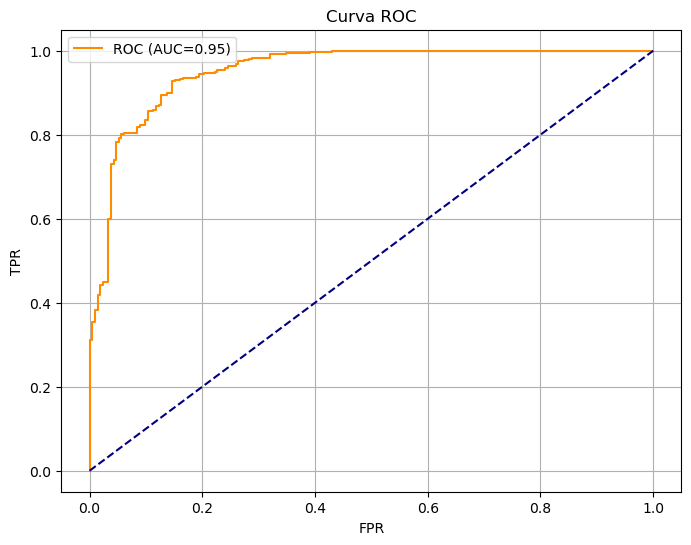

In [15]:
# Curva ROC y AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y2, df['prob_logit'])
auc = roc_auc_score(y2, df['prob_logit'])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC (AUC={auc:.2f})', color='darkorange')
plt.plot([0,1],[0,1], '--', color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Métricas de la matriz de confusión manualmente
def métricas(cm):
    tn, fp, fn, tp = cm.ravel()
    acc = (tp+tn)/(tp+tn+fp+fn)
    prec = tp/(tp+fp)
    rec = tp/(tp+fn)
    spec = tn/(tn+fp)
    f1 = 2*(prec*rec)/(prec+rec)
    print(f"Acc={acc:.4f}, Prec={prec:.4f}, Recl={rec:.4f}, Esp={spec:.4f}, F1={f1:.4f}")

cm = confusion_matrix(y2, df['pred_logit'])
métricas(cm)

Acc=0.8910, Prec=0.8954, Recl=0.9356, Esp=0.8160, F1=0.9151


In [17]:
# 1. Guardar el dataframe principal (con predicciones y probabilidades)
df.to_excel("resultados_clasificacion_cancer.xlsx", index=False)

In [18]:
# Guardar métricas
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

In [19]:
# 2. Crear un nuevo libro de Excel
wb = Workbook()

In [20]:
# --- Hoja 1: Datos y predicciones
ws1 = wb.active
ws1.title = "Datos y Predicciones"
for r in dataframe_to_rows(df, index=False, header=True):
    ws1.append(r)

In [21]:
# --- Hoja 2: Matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2, df['pred_logit'])
cm_labels = ["TN", "FP", "FN", "TP"]
ws2 = wb.create_sheet("Matriz de Confusión")
ws2.append(["", "Pred: 0", "Pred: 1"])
ws2.append(["Real: 0", cm[0][0], cm[0][1]])
ws2.append(["Real: 1", cm[1][0], cm[1][1]])

In [22]:
# --- Hoja 3: Métricas derivadas
tn, fp, fn, tp = cm.ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
prec = tp / (tp + fp)
rec = tp / (tp + fn)
spec = tn / (tn + fp)
f1 = 2 * (prec * rec) / (prec + rec)

ws3 = wb.create_sheet("Métricas")
ws3.append(["Métrica", "Valor"])
ws3.append(["Exactitud", round(acc, 4)])
ws3.append(["Precisión", round(prec, 4)])
ws3.append(["Sensibilidad (Recall)", round(rec, 4)])
ws3.append(["Especificidad", round(spec, 4)])
ws3.append(["F1 Score", round(f1, 4)])

In [23]:
# --- Hoja 4: Resumen del modelo (como texto)
ws4 = wb.create_sheet("Resumen Statsmodels")
summary_text = res_logit.summary().as_text().split('\n')
for line in summary_text:
    ws4.append([line])

In [24]:
# 3. Guardar todo el libro
wb.save("reporte_modelo_cancer.xlsx")